In [ ]:
from google.colab import files
ckd = files.upload()

Saving Chronic_Kidney_Dsease_data.csv to Chronic_Kidney_Dsease_data (1).csv


**Import necessary libraries and load dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# load the dataset
ckd_df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# display the first 5 rows of the dataset
pd.set_option("display.max_columns", None)
ckd_df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


**Check missing values and basic statistical values**

In [ ]:
# check missing values
ckd_df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
SocioeconomicStatus,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0


In [ ]:
# drop Unecessary PatientID and DoctorInCharge columns
ckd_df.drop(columns = ['PatientID', 'DoctorInCharge'], inplace = True)

In [ ]:
# check other columns and data types
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1659 non-null   int64  
 1   Gender                         1659 non-null   int64  
 2   Ethnicity                      1659 non-null   int64  
 3   SocioeconomicStatus            1659 non-null   int64  
 4   EducationLevel                 1659 non-null   int64  
 5   BMI                            1659 non-null   float64
 6   Smoking                        1659 non-null   int64  
 7   AlcoholConsumption             1659 non-null   float64
 8   PhysicalActivity               1659 non-null   float64
 9   DietQuality                    1659 non-null   float64
 10  SleepQuality                   1659 non-null   float64
 11  FamilyHistoryKidneyDisease     1659 non-null   int64  
 12  FamilyHistoryHypertension      1659 non-null   i

In [ ]:
# Display basic statistics
ckd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1659.0,54.441230,20.549757,20.000000,36.000000,54.000000,72.000000,90.000000
Gender,1659.0,0.515371,0.499914,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,1659.0,0.713080,1.000430,0.000000,0.000000,0.000000,1.000000,3.000000
SocioeconomicStatus,1659.0,0.977697,0.776686,0.000000,0.000000,1.000000,2.000000,2.000000
EducationLevel,1659.0,1.693189,0.910611,0.000000,1.000000,2.000000,2.000000,3.000000
BMI,1659.0,27.620049,7.288670,15.033888,21.471449,27.652077,34.015849,39.993532
Smoking,1659.0,0.292948,0.455252,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,1659.0,9.969831,5.798787,0.021740,5.051156,9.951503,14.967100,19.992713
PhysicalActivity,1659.0,5.024247,2.866274,0.001186,2.555038,5.072395,7.460563,9.998167
DietQuality,1659.0,5.028544,2.865777,0.002407,2.558443,4.989810,7.428290,9.998927


**Separate catagorical and numerical columns**

In [ ]:
# Obtain catagorical and numerical columns
# Catagorical feature → number of unique values < 5
cat_cols = [col for col in ckd_df.columns if ckd_df[col].nunique() < 5]
num_cols = [col for col in ckd_df.columns if col not in cat_cols]

print(f"Catagorical Columns: {len(cat_cols)}")
print("-"*40)
for cat in cat_cols:
    print(cat)

print("\n\n")
print(f"Numberical Columns: {len(num_cols)}")
print("-"*40)
for num in num_cols:
    print(num)

cat_cols.remove("Diagnosis")

Catagorical Columns: 19
----------------------------------------
Gender
Ethnicity
SocioeconomicStatus
EducationLevel
Smoking
FamilyHistoryKidneyDisease
FamilyHistoryHypertension
FamilyHistoryDiabetes
PreviousAcuteKidneyInjury
UrinaryTractInfections
ACEInhibitors
Diuretics
Statins
AntidiabeticMedications
Edema
HeavyMetalsExposure
OccupationalExposureChemicals
WaterQuality
Diagnosis



Numberical Columns: 33
----------------------------------------
Age
BMI
AlcoholConsumption
PhysicalActivity
DietQuality
SleepQuality
SystolicBP
DiastolicBP
FastingBloodSugar
HbA1c
SerumCreatinine
BUNLevels
GFR
ProteinInUrine
ACR
SerumElectrolytesSodium
SerumElectrolytesPotassium
SerumElectrolytesCalcium
SerumElectrolytesPhosphorus
HemoglobinLevels
CholesterolTotal
CholesterolLDL
CholesterolHDL
CholesterolTriglycerides
NSAIDsUse
FatigueLevels
NauseaVomiting
MuscleCramps
Itching
QualityOfLifeScore
MedicalCheckupsFrequency
MedicationAdherence
HealthLiteracy


In [ ]:
def addlabels(df, ax, percentage=False):
    rn, cn = df.shape[0], df.shape[1]
    for i in range(rn):
        for j in range(1, cn):
            value = df.iloc[i, j]
            ax.text(i, value + 0.1, str(value)+"%" if percentage else str(value), ha='center', va='top', fontsize=10, c='white')

def cal_percentage(df):
    df['RowSum'] = df.sum(axis=1)
    for col in df.columns[1:]:
        df[col] = round((df[col] / df['RowSum']) * 100)
    df = df.drop(columns=['RowSum'])

    return df

def plot_bar_graph(ax, df, col, xlabel, colors):
    if col not in df.columns:
        print(f"Column '{col}' does not exist in the DataFrame.")
        return

    # count the values
    count_df = df[col].value_counts()
    count_df.sort_index(inplace=True)  # Sort by the first column (col)in ascending order

    # plot the bar graph
    count_df.plot(kind='bar', color=colors, ax=ax)

        # set graph options
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Count')
    ax.set_title(f'{col} Distribution')
    ax.set_xticklabels(count_df.index, rotation=0)

    # show the data label
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)

    plt.tight_layout()


def plot_stacked_bar_graph(ax, df, col, xlabel, colors):
    if col not in df.columns:
        print(f"Column '{col}' does not exist in the DataFrame.")
        return

    # process data
    count_df = df.groupby(['Diagnosis', col]).size().unstack(fill_value=0)
    count_df = count_df.transpose().reset_index()
    count_df.columns.name = None

    # Sort by the first column (col) in ascending order
    count_df.sort_values(by=col, ascending=True, inplace=True)

    # plot the stacked bar graph
    count_df.plot(x=col, kind='bar', stacked=True, ax=ax, color=colors)

    # set graph options
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Count')
    ax.set_title(f'{col} Count Distribution')
    ax.set_xticklabels(count_df.index, rotation=0)
    ax.legend(title="Diagnosis", bbox_to_anchor=(1.05, 1), loc='upper left')

    addlabels(count_df, ax)

    plt.tight_layout()


def plot_percentage_stacked_bar_graph(ax, df, col, xlabel, colors):
    if col not in df.columns:
        print(f"Column '{col}' does not exist in the DataFrame.")
        return

    # process data
    count_df = df.groupby(['Diagnosis', col]).size().unstack(fill_value=0)
    count_df = count_df.transpose().reset_index()
    count_df.columns.name = None
    count_df_p = cal_percentage(count_df)

    # Sort by the first column (col) in ascending order
    count_df_p.sort_values(by=col, ascending=True, inplace=True)

    # plot the stacked bar graph
    count_df_p.plot(x=col, kind='bar', stacked=True, ax=ax, color=colors)

    # set graph options
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Percentage(%)')
    ax.set_title(f'{col} Percentage Distribution')
    ax.set_xticklabels(count_df_p.index, rotation=0)
    ax.legend(title="Diagnosis", bbox_to_anchor=(1.05, 1), loc='upper left')

    # show the data label
    addlabels(count_df_p, ax, True)

    plt.tight_layout()

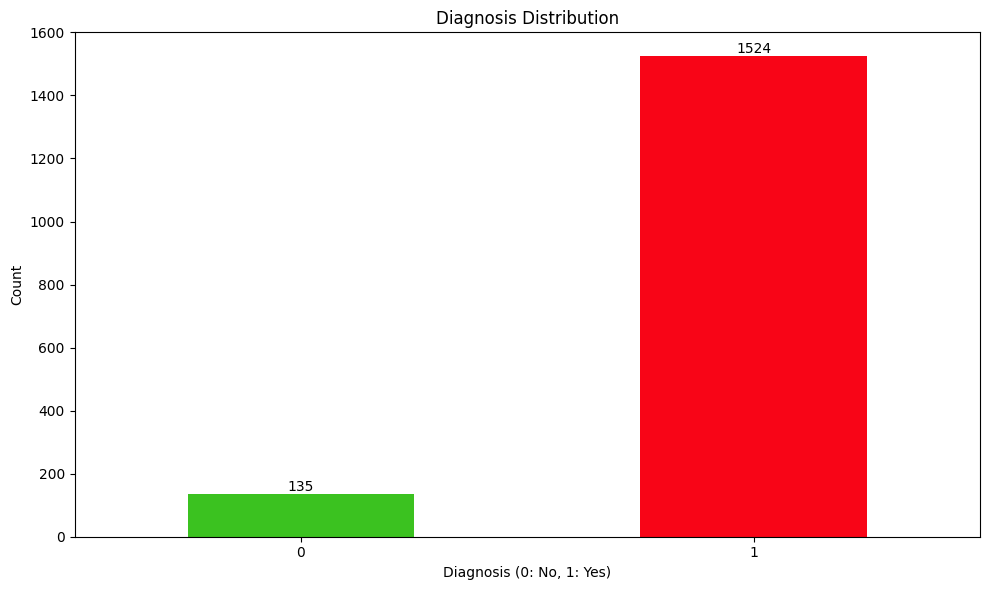

In [ ]:
colors = ['#3BC220', '#F80517']
fig, ax = plt.subplots(figsize=(10, 6))
plot_bar_graph(ax, ckd_df, "Diagnosis", "Diagnosis (0: No, 1: Yes)", colors)
plt.show()

In [ ]:
xlabel_ca =  {
    "Gender": "Gender(0: Male, 1: Female)",
    "Ethnicity": "Ethnicity(0: Caucasian, 1: African American, 2: Asian, 3: Other)",
    "EducationLevel": "EducationLevel(0: None, 1: High School, 2: Bachelor's, 3: Higher)",
    "Smoking": "Smoking(0: No, 1: Yes)",
    "FamilyHistoryKidneyDisease": "FamilyHistoryKidneyDisease(0: No, 1: Yes)",
    "FamilyHistoryHypertension": "FamilyHistoryHypertension(0: No, 1: Yes)",
    "FamilyHistoryDiabetes": "FamilyHistoryDiabetes(0: No, 1: Yes)",
    "PreviousAcuteKidneyInjury": "PreviousAcuteKidneyInjury(0: No, 1: Yes)",
    "UrinaryTractInfections": "UrinaryTractInfections(0: No, 1: Yes)",
    "ACEInhibitors": "ACEInhibitors(0: No, 1: Yes)",
    "Diuretics": "Diuretics(0: No, 1: Yes)",
    "Statins": "Statins(0: No, 1: Yes)",
    "AntidiabeticMedications": "AntidiabeticMedications(0: No, 1: Yes)",
    "Edema": "Edema(0: No, 1: Yes)",
    "HeavyMetalsExposure": "HeavyMetalsExposure(0: No, 1: Yes)",
    "SocioeconomicStatus": "SocioeconomicStatus(0: Low, 1: Middle, 2: High)",
    "OccupationalExposureChemicals": "OccupationalExposureChemicals(0: No, 1: Yes)",
    "WaterQuality": "WaterQuality(0: Good, 1: Poor)"
}

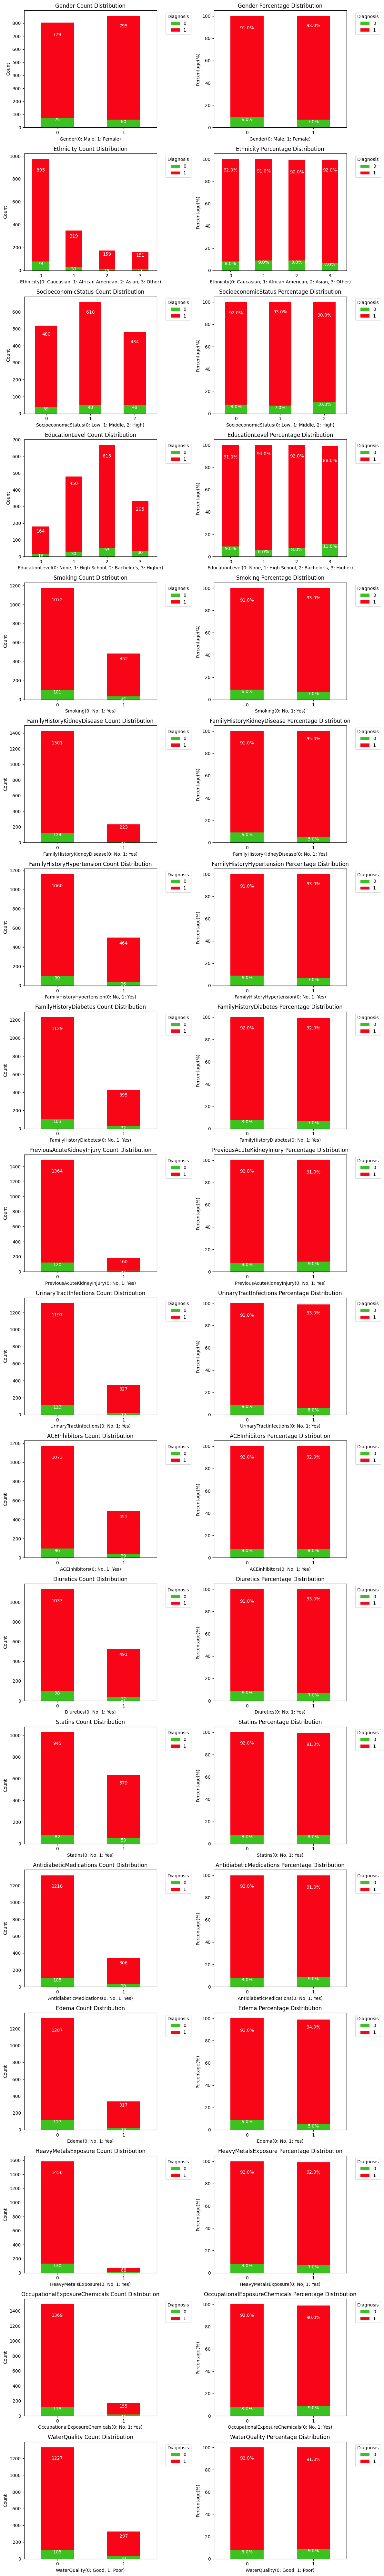

In [ ]:
fig, axs = plt.subplots(18, 2, figsize=(12, 80))

for i, ca_col in enumerate(cat_cols):
    if not ca_col in xlabel_ca:
        print(f"{ca_col} does not exist in the xlabel dictionary")
        continue
    plot_stacked_bar_graph(axs[i,0], ckd_df, ca_col, xlabel_ca[ca_col], colors)
    plot_percentage_stacked_bar_graph(axs[i,1], ckd_df, ca_col, xlabel_ca[ca_col], colors)


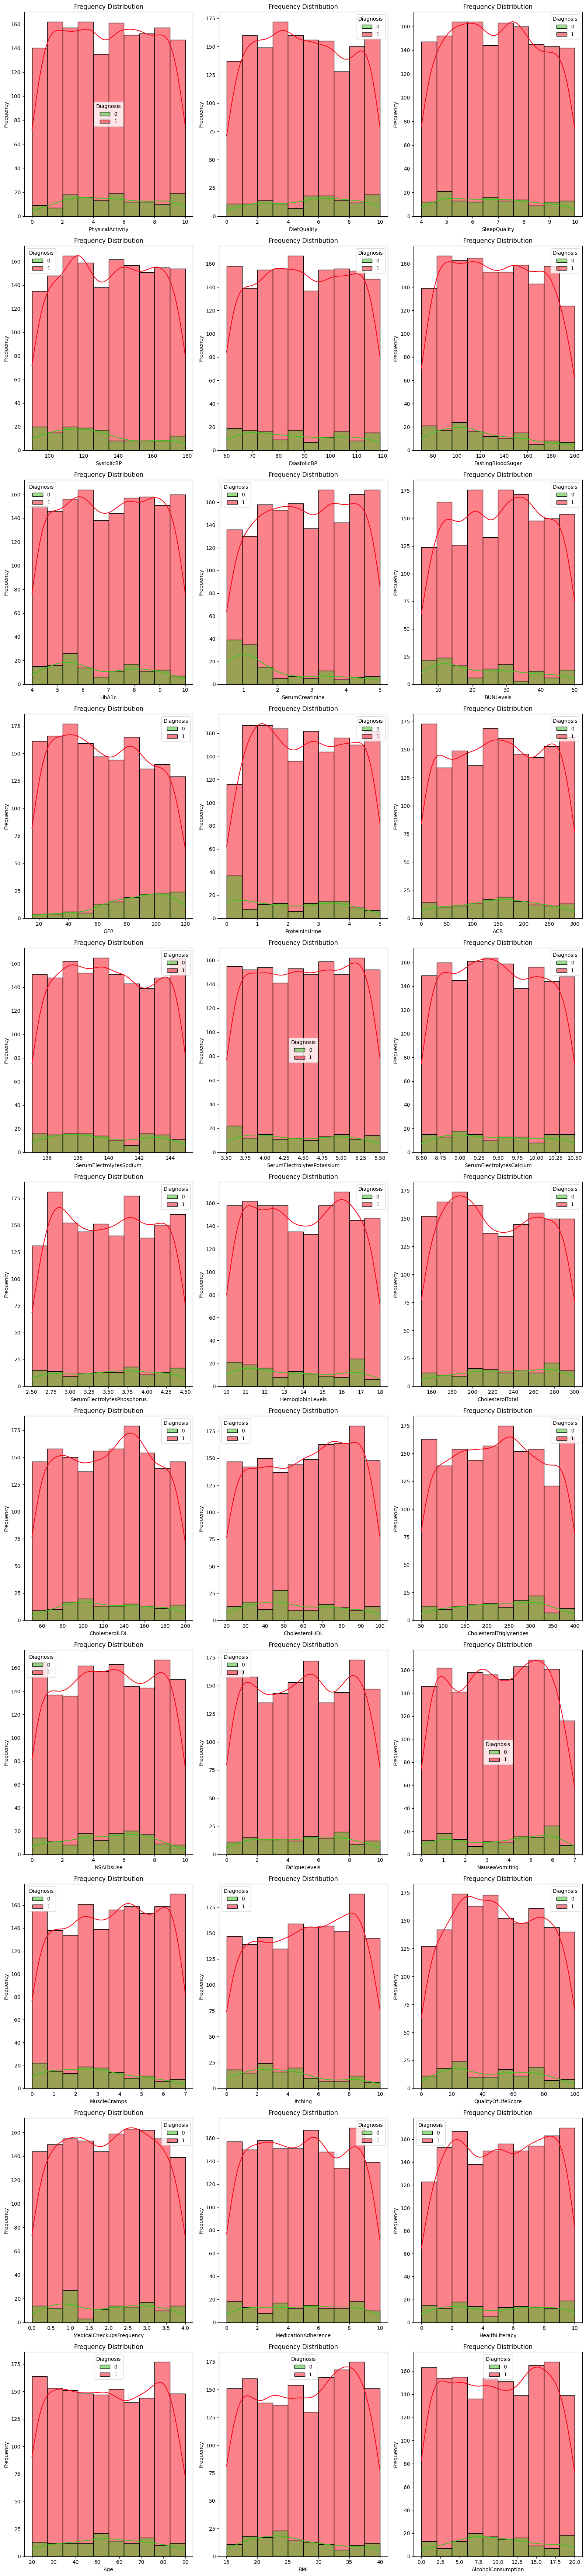

In [ ]:
fig, axs = plt.subplots(11, 3, figsize=(16, 70))
for i, num_col in enumerate(num_cols):
    row, col= int(i/3)-1, i%3
    ax = axs[row, col]
    sns.histplot(ckd_df, x=ckd_df[num_col], bins=10,hue = 'Diagnosis', kde=True, ax=ax, palette={0:'#3BC220', 1:'#F80517'})
    ax.set_xlabel(num_col)
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency Distribution')
    plt.tight_layout()
plt.show()

In [ ]:
X = ckd_df.drop('Diagnosis', axis=1)
y = ckd_df['Diagnosis']

smote = SMOTE()
X_res, y_res =  smote.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       297
           1       0.96      0.96      0.96       313

    accuracy                           0.96       610
   macro avg       0.96      0.96      0.96       610
weighted avg       0.96      0.96      0.96       610

Model saved as random_forest_model_ckd.pkl


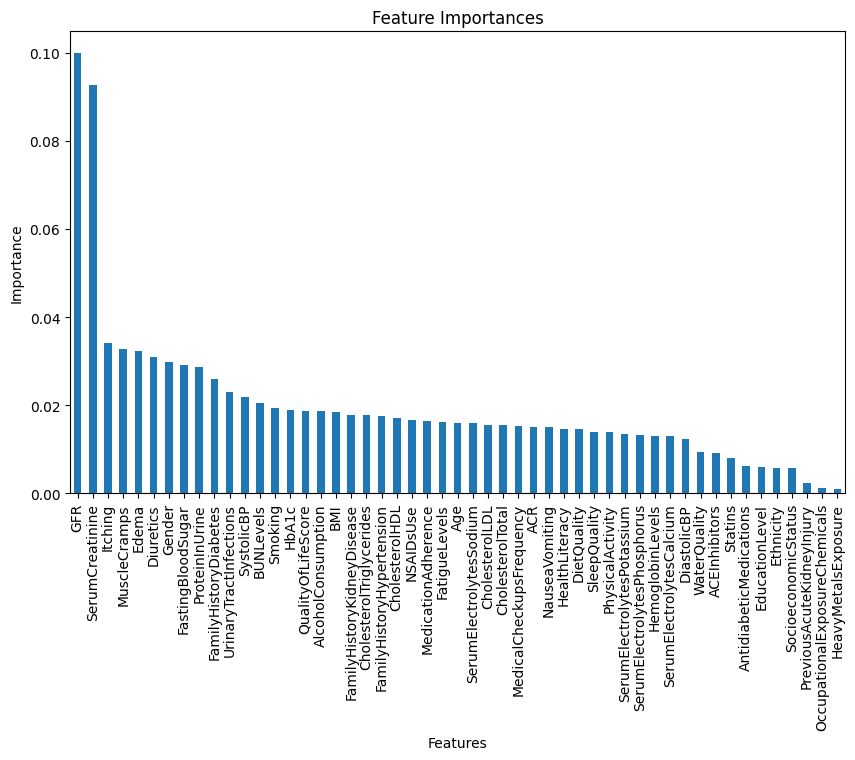

In [ ]:
import joblib # for saving the model
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# initialize and training the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

# Save the trained model
joblib.dump(clf, 'finalckd_model_ckd.pkl')
print("Model saved as random_forest_model_ckd.pkl")

# get feature importances
feature_importances = clf.feature_importances_

# plot feature importances
features = X.columns
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

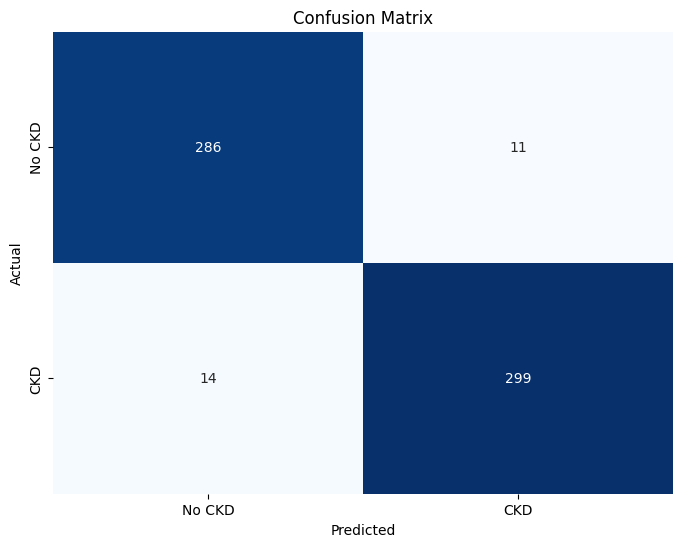

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' are the true labels and 'y_pred' are the predicted labels

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [2]:
import joblib

# Load the trained model
model = joblib.load('finalckd_model_ckd.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'finalckd_model_ckd.pkl'

In [1]:
features = ['Age', 	'Gender', 'Ethnicity',
            'SocioeconomicStatus',	'EducationLevel',
            'BMI',	'Smoking',	'AlcoholConsumption',	'PhysicalActivity',
            'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease',
            'FamilyHistoryHypertension',	'FamilyHistoryDiabetes',
            'PreviousAcuteKidneyInjury',	'UrinaryTractInfections',
            'SystolicBP',	'DiastolicBP', 	'FastingBloodSugar',	'HbA1c',
            'SerumCreatinine',	'BUNLevels',	'GFR',	'ProteinInUrine',	'ACR',
            'SerumElectrolytesSodium', 	'SerumElectrolytesPotassium',
            'SerumElectrolytesCalcium', 	'SerumElectrolytesPhosphorus',
            'HemoglobinLevels'	'CholesterolTotal',	'CholesterolLDL',
            'CholesterolHDL',	'CholesterolTriglycerides',	'ACEInhibitors',
            'Diuretics',	'NSAIDsUse',	'Statins', 	'AntidiabeticMedications',
            'Edema', 	'FatigueLevels',	'NauseaVomiting',	'MuscleCramps',	'Itching',
            'QualityOfLifeScore',	'HeavyMetalsExposure',	'OccupationalExposureChemicals',
            'WaterQuality',	'MedicalCheckupsFrequency',	'MedicationAdherence',
            'HealthLiteracy']
input_data = []
for feature in X_train.columns:
  value = float(input(f"Enter value for {feature}: "))
  input_data.append(value)

# Convert input data to a NumPy array
input_data = np.array(input_data).reshape(1, -1)

NameError: name 'X_train' is not defined

In [ ]:
prediction = model.predict(input_data)[0]

# Display the prediction
if prediction == 0:
  print("The model predicts that the patient does not have Chronic Kidney Disease.")
else:
  print("The model predicts that the patient has Chronic Kidney Disease.")

The model predicts that the patient has Chronic Kidney Disease.
